# Expectation value of the square norm of the directional derivative of the input output map of a maxout network for a fixed random direction with respect to the weights as a function of the input. 

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
np.random.seed(80519)

K = 5
x_samples = 200
weight_samples = 500

DEPTH = 10
WIDTH = 20

second_moments = []

u = np.zeros([WIDTH])
u[np.random.choice(list(range(WIDTH)))] = 1

for xi in range(x_samples):
    x = np.random.normal(loc=0., scale=1, size=WIDTH)

    jx_array = []    
    for _ in range(weight_samples):

        fan_in = WIDTH
        fan_out = WIDTH
        cur_x = x
        cur_u = u

        for d in range(DEPTH):
            if d == DEPTH - 1:
                fan_out = 1

            weights = np.random.normal(loc=0., scale=1./np.sqrt(fan_in), size=[fan_out, K, fan_in])
            biases = np.random.normal(loc=0., scale=1./np.sqrt(fan_in), size=[fan_out, K])
            argmax = np.argmax(np.dot(weights, cur_x) + biases, axis=-1)
            chosen_weights = np.asarray([w[a] for w,a in zip(weights, argmax)])

            cur_x = np.max(np.dot(weights, cur_x) + biases, axis=-1)
            cur_u = np.dot(chosen_weights, cur_u)
            if d < DEPTH - 1:
                cur_u = cur_u / np.linalg.norm(cur_u)

        jx_array.append(fan_in * np.squeeze(cur_u)**2)

    second_moments.append(np.mean(jx_array))

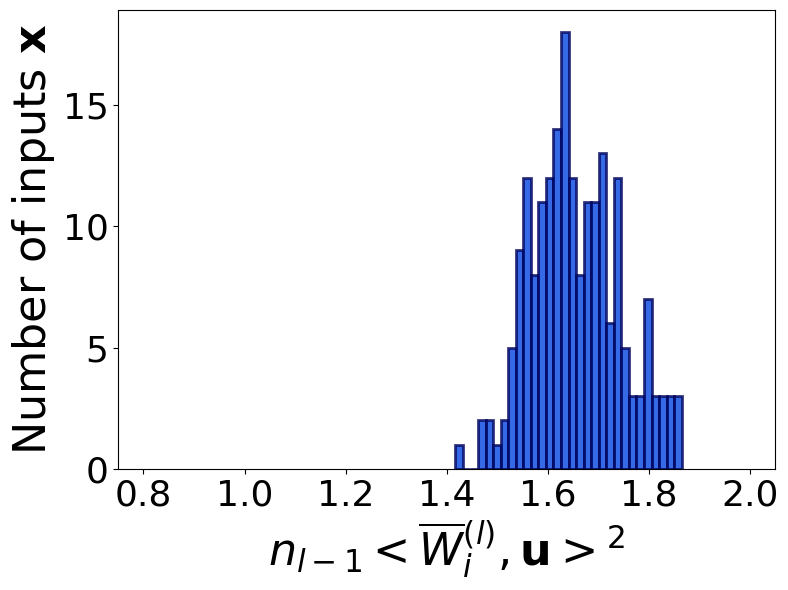

In [3]:
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=26)
ax.tick_params(axis='both', which='minor', labelsize=26)

plt.ylabel('Number of inputs $\mathbf{x}$', size=32)
plt.xlabel("$n_{l-1} < \overline{W}_{i}^{(l)}, \mathbf{u} >^2$", size=32)
plt.margins(x=0)

plt.xticks([0.8, 1., 1.2, 1.4, 1.6, 1.8, 2.])
ax.set_xlim([0.75, 2.05])

bins = 30
plt.hist(second_moments, bins=bins, alpha=0.8, color='xkcd:blue', edgecolor='xkcd:dark blue',
         linewidth=2)
plt.tight_layout()
plt.savefig(f'jacobian_and_width_{WIDTH}_depth_{DEPTH}.png')